<h1>Campos Vectoriales sobre $S^1$</h1>
<br/>
En este cuadernillo exploramos algunos campos vectoriales sobre el círculo unidad $S^1$. Asimismo exploramos el corchete de Lie y el conjunto $\mathcal{D}_t$

Emepzamos llamando algunas liberias

In [1]:
#Instruction for inline graphics
%matplotlib inline

import types
import inspect
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import matplotlib.animation as animation

#Basic mathematical functions library
import numpy as np
from scipy.misc import derivative as scidiff
#Numerical analysis library integration funcitons
#from scipy.integrate import quad
#from scipy.integrate import dblquad

A continuación graficamos la variedad $S^1$ inmersa en $\mathbb{R}^2$

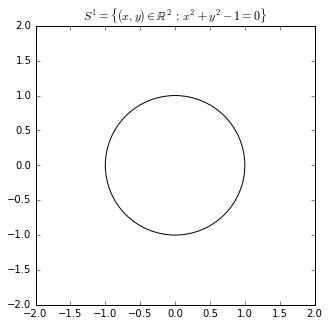

In [7]:
plt.figure(figsize = (5,5))
ax = plt.gca()
ax.add_patch(mpatches.Circle((0,0), 1,  fc = 'w', ec = 'k'))
plt.xlim(-2,2)
plt.ylim(-2,2)
ax.set_title("$S^1=\{(x,y)\in\mathbb{R}^2\,:\,x^2+y^2-1=0\}$")
#ax.set_aspcet('equal')
plt.show()

In [8]:
class Gradient:
    def __init__(self, f):
        if not isinstance(f, types.FunctionType):
            raise TypeError("El arguento de Gradient debe ser del Tipo Función")
        else:
            if len(inspect.getargspec(f)[0]) != 2:
                raise TypeError("El primer arguento de Gradient debe ser del Tipo Función de Dos Variables: x e y")
        self.f = f
    def __call__(self, x0, y0):
        dfdx = scidiff(lambda x: self.f(x,y0), x0, dx = 1e-11)
        dfdy = scidiff(lambda x: self.f(x0,x), y0, dx = 1e-11)
        return np.array([dfdx, dfdy])


class VectorFieldOverS1:
    def __init__(self, X, smplsz = 20):
        if not isinstance(X, types.FunctionType):
            raise TypeError("El primer arguento de VectorFieldOverS1 debe ser del Tipo Función")
        else:
            if len(inspect.getargspec(X)[0]) != 2:
                raise TypeError("El primer arguento de VectorFieldOverS1 debe ser del Tipo Función de Dos Variables: x e y")
            else:
                self.X = X
                self.smplsz = smplsz
                self.x = np.array([np.cos(i*2*np.pi/smplsz) for i in xrange(0, smplsz)])
                self.y = np.array([np.sin(i*2*np.pi/self.smplsz) for i in xrange(0, smplsz)])
                self.aughsmplsz = 10*smplsz
                self.t = np.linspace(0, 2*np.pi, self.aughsmplsz)
                self.maxplotrange = 2*max(abs(np.vectorize(X)(self.x,self.y)))
                self.s = np.linspace(-self.maxplotrange, self.maxplotrange, self.aughsmplsz)
                self.X_as_vector = np.vectorize(X)(self.x,self.y)
    def __str__(self):
        return inspect.getsourcelines(self.X)[0][0]
    
    def __call__(self, f, x, y):
        return f(x,y) #No está implementada aún
    
    def plot_as_vector_field(self):
        plt.figure(figsize = (4,4))
        plt.axes(polar = False)
        plt.xlim(-2,2)
        plt.ylim(-2,2)
        Xval = np.vectorize(self.X)(self.x, self.y)
        plt.quiver(self.x, self.y, -Xval*self.y, Xval*self.x,\
                   color='b', units='x', linewidths=(2,), edgecolors=('k'), headaxislength=5)
        plt.gca().add_patch(mpatches.Circle((0,0), 1, fc = 'w', ec = 'k', zorder = 0, linestyle = 'dashed'))
        plt.title(self.__str__() + "\n As Tangent Vector Field")
        plt.show()
    def plot_as_normal_vector_field(self):        
        u = np.cos(self.t)
        v = np.sin(self.t)
        plt.figure(figsize = (4,4))
        plt.axes(polar = True)
        plt.plot(self.t, (np.vectorize(self.X)(u, v)+1))
        plt.plot(self.t, np.ones(self.aughsmplsz), linestyle = 'dashed', color = 'k')
        plt.title(self.__str__() + "\n As Normal Vector Field")
        plt.show()
    def plot_in_tangent_bundle(self):
        ss, tt = np.meshgrid(self.s, self.t)
        X = np.cos(tt)
        Y = np.sin(tt)
        Z = ss
        fig = plt.figure(figsize = (4,4))
        ax = plt.gca(projection = '3d')
        plt.plot(np.sin(self.t), np.cos(self.t), 0, linestyle = 'dashed', color = 'k')
        plt.plot(np.sin(self.t), np.cos(self.t), np.vectorize(self.X)(np.cos(self.t),np.sin(self.t)), color = 'r')
        plt.title(self.__str__() + "\n In Tangent Bundle")
        ax.plot_surface(X, Y, Z, alpha = 0.3, linewidth = 0.0, color = 'g', antialiased = True)
        plt.show()
    def __add__(self, other):
        return VectorFieldOverS1(lambda x, y: self.X(x,y) + other.X(x,y))
    def __sub__(self, other):
        return VectorFieldOverS1(lambda x, y: self.X(x,y) - other.X(x,y))
    def composite(self, other):
        GY = Gradient(other.X)
        Z = lambda x, y: self.X(x,y)*np.dot(GY(x,y), np.array([-y, x]))
        return VectorFieldOverS1(Z)
    def __mul__(self, other):
        GY = Gradient(other.X)
        GX = Gradient(self.X)
        Z = lambda x, y: self.X(x,y)*np.dot(GY(x,y), np.array([-y, x])) - other.X(x,y)*np.dot(GX(x,y), np.array([-y, x]))
        return VectorFieldOverS1(Z)
    def __neg__(self):
        return VectorFieldOverS1(lambda x, y: -self.X(x,y))

In [9]:
X1 = VectorFieldOverS1(lambda x, y: y)
X2 = VectorFieldOverS1(lambda x, y: x )
X3 = VectorFieldOverS1(lambda x, y: x + y)
X4 = VectorFieldOverS1(lambda x, y: 1 + 0*x)

In [23]:
X1

TypeError: __call__() takes exactly 4 arguments (3 given)

In [17]:
JacobiIdentity = ( ((X1 * X2) * X3) + (((X2 * X3) * X1)) + (((X3 * X1) * X2)) )

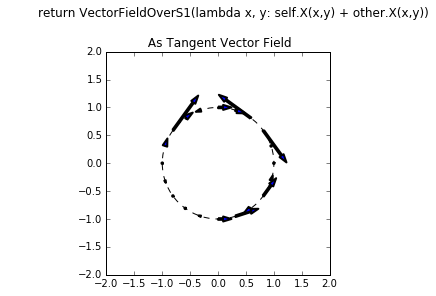

In [18]:
JacobiIdentity.plot_as_vector_field()

In [8]:
JacobiIdentity.X_as_vector

array([  0.00000000e+00,   0.00000000e+00,  -1.63816545e-05,
         1.63816545e-05,  -4.32303225e-06,  -5.55109813e-06,
         2.20269495e-06,  -3.83572621e-06,  -1.78253525e-05,
        -3.26286360e-06,   3.39908216e-11,   1.06016865e-06,
         1.11022302e-16,   0.00000000e+00,  -1.06016865e-06,
         5.55111512e-06,   1.00420616e-05,  -3.83572621e-06,
         9.11515042e-06,   2.20269495e-06])

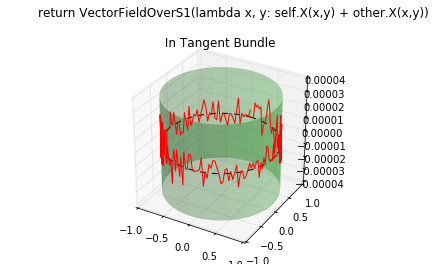

In [19]:
JacobiIdentity.plot_in_tangent_bundle()

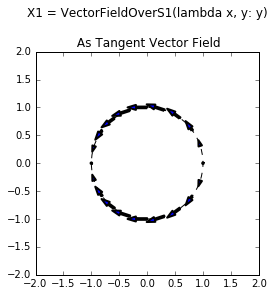

In [10]:
X1.plot_as_vector_field()

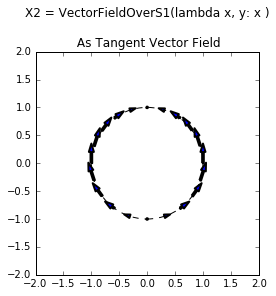

In [11]:
X2.plot_as_vector_field()

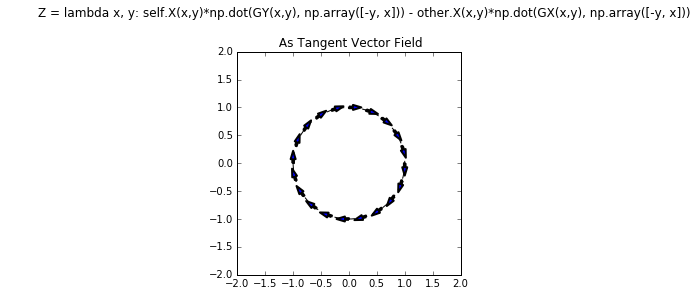

In [12]:
(X1 * X2).plot_as_vector_field()

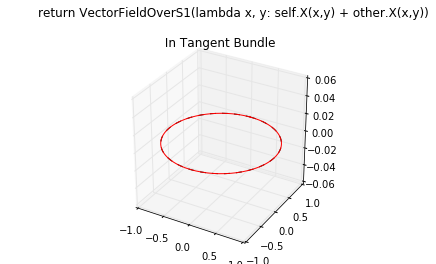

In [13]:
( ((X1 * X2) * X1) + ( (X2 * X1) * X1) ).plot_in_tangent_bundle()

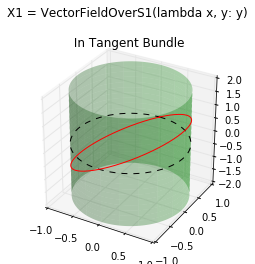

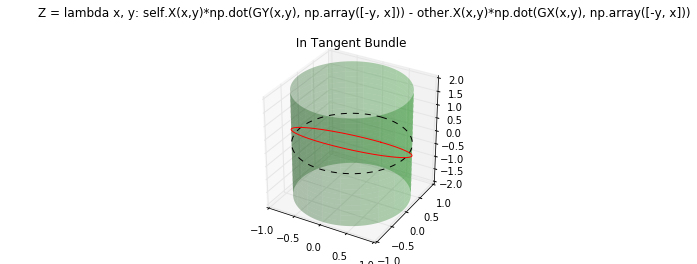

In [17]:
(X1).plot_in_tangent_bundle()
(X1 * X4).plot_in_tangent_bundle()

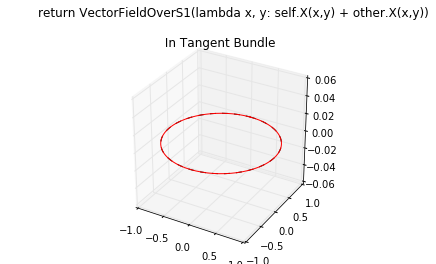

In [22]:
(X1 * X2 + X2 * X1).plot_in_tangent_bundle()

In [7]:
max(abs(np.linspace(-1,2)))

2.0